In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('Project1_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum().any()

False

In [5]:
df.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


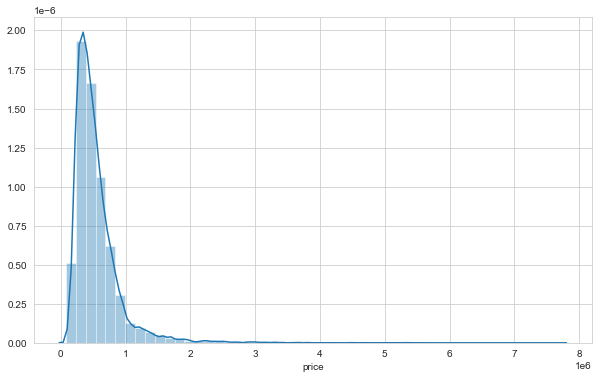

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df.price);

# FEATURE ENGINEERING

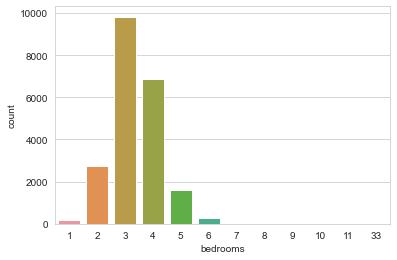

In [7]:
sns.countplot(df.bedrooms);

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

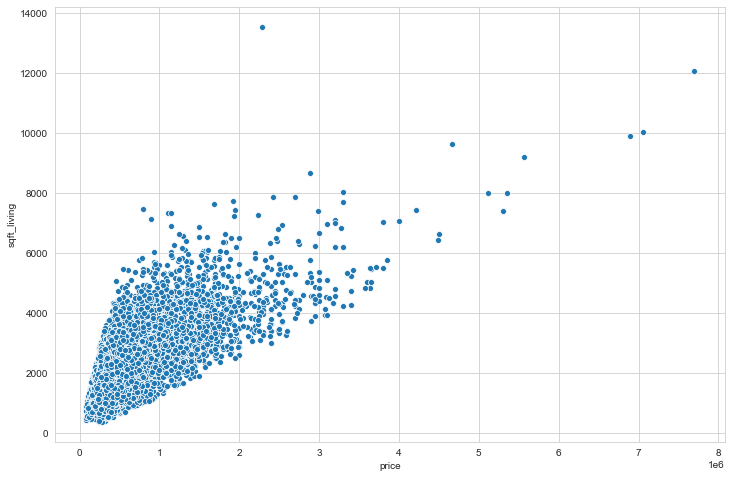

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df);

In [10]:
df[df.bedrooms>8][['price', 'bedrooms', 'sqft_living']]

,price,bedrooms,sqft_living
4092,599999.0,9,3830
4231,700000.0,9,3680
6073,1280000.0,9,3650
8537,450000.0,9,4050
8748,520000.0,11,3000
13301,1150000.0,10,4590
15147,650000.0,10,3610
15856,640000.0,33,1620
16830,1400000.0,9,4620
18428,934000.0,9,2820


In [11]:
# Here we see that 33 bedrooms is a typo. It should be 3
df.groupby('bedrooms')['sqft_living'].mean()

bedrooms
1      888.153061
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64

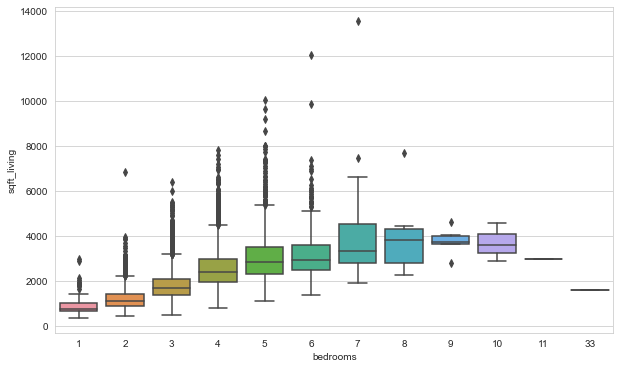

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='sqft_living', data=df);

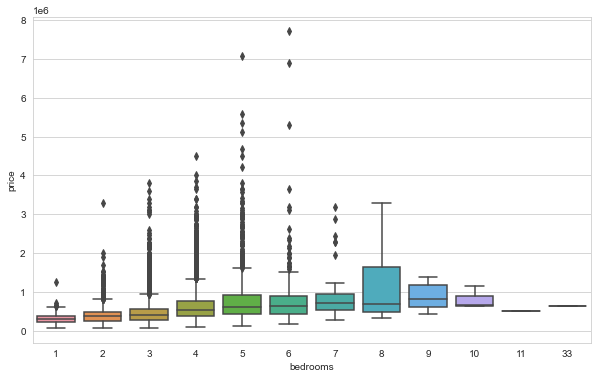

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df);

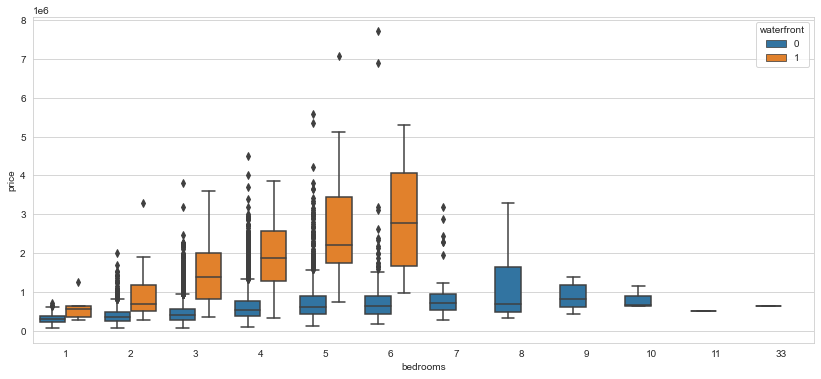

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y='price', data=df, hue='waterfront');

In [15]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

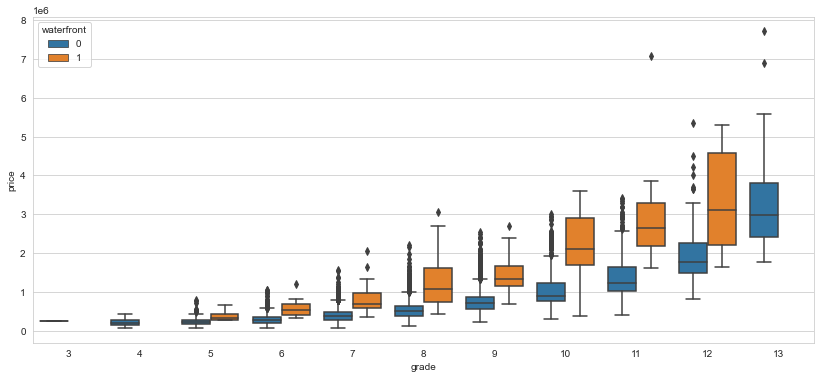

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='grade', y='price', data=df, hue='waterfront');

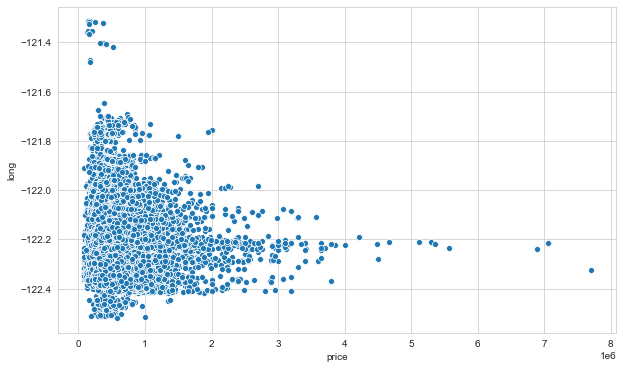

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='long', data=df);

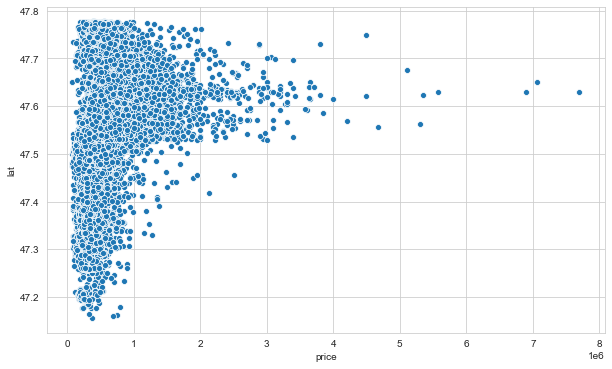

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='lat', data=df);

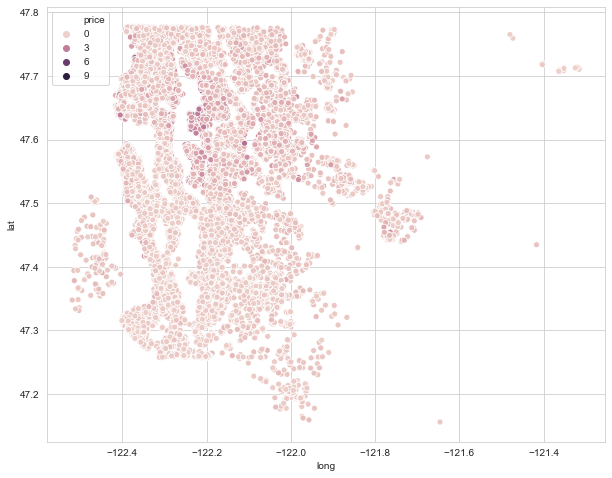

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [20]:
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [21]:
non_top_99= df.sort_values('price',ascending=False).iloc[216:]

In [22]:
non_top_99

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


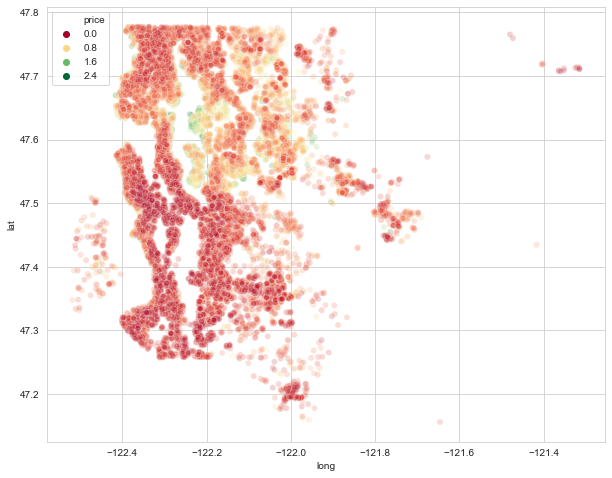

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=non_top_99, hue='price', palette='RdYlGn', alpha=0.2);

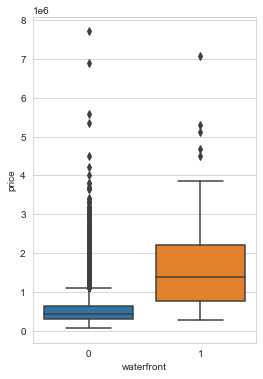

In [24]:
plt.figure(figsize=(4,6))
sns.boxplot(x='waterfront', y='price', data=df);

In [25]:
df=df.drop('id', axis=1)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.date=pd.to_datetime(df.date)

In [28]:
df['year']=df.date.apply(lambda date: date.year)
df['month']=df.date.apply(lambda date: date.month)

In [29]:
df.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


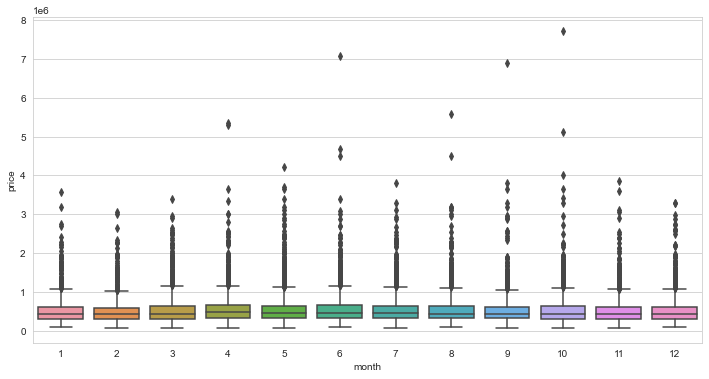

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df)

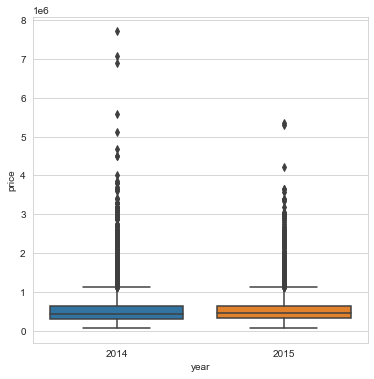

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(x='year', y='price', data=df);

In [33]:
df=df.drop('date', axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


## ZIPCODE

In [35]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head()

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
Name: price, dtype: float64

In [36]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

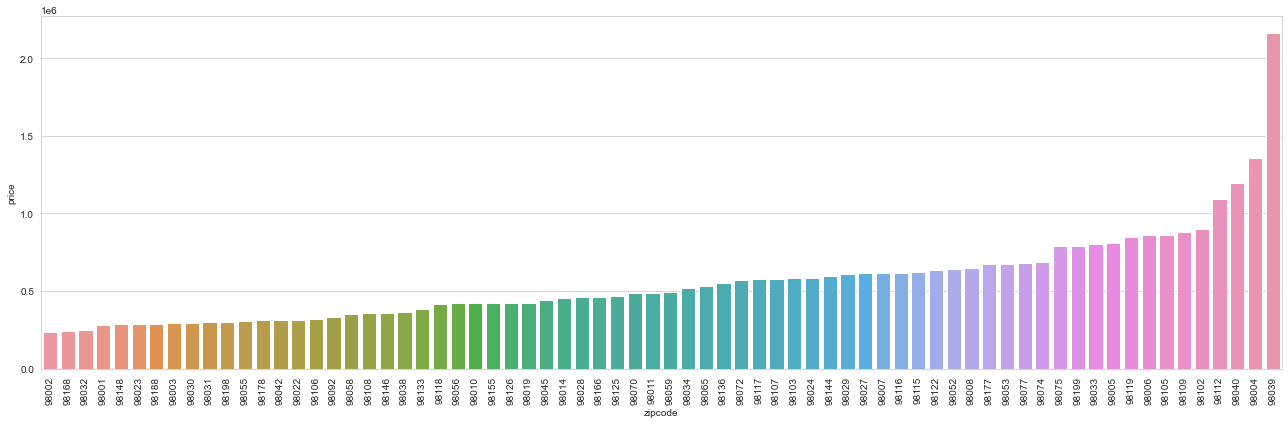

In [37]:
df2=pd.DataFrame()
df2['zipcode']=df.groupby('zipcode')['price'].mean().sort_values(ascending=False).keys()
df2['price']=df.groupby('zipcode')['price'].mean().sort_values(ascending=False).values

plt.figure(figsize=(18,6))
ax = sns.barplot(x="zipcode", y="price", data=df2, order=df2.sort_values('price').zipcode)
plt.xticks(rotation=90)
plt.tight_layout();

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039   2161300.000
98004   1356523.991
98040   1194873.638
98112   1096239.007
98102    899607.673
            ...    
98148    284908.596
98001    281194.870
98032    251296.240
98168    240328.372
98002    234284.035
Name: price, Length: 70, dtype: float64

In [40]:
def cls(x):
    if df[df.zipcode==x].price.mean()>=2e+06:
        return 5
    elif df[df.zipcode==x].price.mean()>=1e+06:
        return 4
    elif df[df.zipcode==x].price.mean()>=7e+05:
        return 3
    elif df[df.zipcode==x].price.mean()>4e+05:
        return 2
    else:
        return 1

In [41]:
df['zip'] = df.zipcode.apply(cls)

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,zip
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014,10,1
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,...,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,2
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015,2,2
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014,12,2
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015,2,2


In [43]:
df.groupby('zip').price.mean()

zip
1    316996.338
2    552262.805
3    829255.852
4   1223341.894
5   2161300.000
Name: price, dtype: float64

In [44]:
df=df.drop('zipcode', axis=1)

In [45]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [46]:
df.groupby('condition').price.mean()

condition
1   341067.241
2   328178.759
3   542173.057
4   521374.450
5   612577.743
Name: price, dtype: float64

In [47]:
df.view.value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [48]:
df.groupby('view').price.mean()

view
0    496739.603
1    812518.608
2    792855.968
3    972468.392
4   1464362.649
Name: price, dtype: float64

In [49]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [50]:
df.groupby('grade').price.mean()

grade
3     262000.000
4     212001.852
5     248523.971
6     301916.571
7     402594.573
8     542986.800
9     773738.222
10   1072347.467
11   1497792.378
12   2202528.090
13   3710769.231
Name: price, dtype: float64

## YR_BUILT --> age

In [51]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [52]:
df['age']=2018-df.yr_built

In [53]:
df=df.drop('yr_built', axis=1)

In [54]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'zip', 'age'],
      dtype='object')

## sqft_basement --> basement

In [55]:
df.sqft_basement.sort_values(ascending=False)

8085     4820
12764    4130
15468    3500
7245     3480
10074    3260
         ... 
12727       0
12723       0
12722       0
12719       0
0           0
Name: sqft_basement, Length: 21597, dtype: int64

In [56]:
df.sqft_basement.value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [57]:
df.sqft_basement.describe()

count   21597.000
mean      291.725
std       442.668
min         0.000
25%         0.000
50%         0.000
75%       560.000
max      4820.000
Name: sqft_basement, dtype: float64

In [58]:
df.sqft_basement.mean()

291.72500810297726

In [59]:
df[df.sqft_basement!=0].sqft_basement.mean()

742.3571344409096

In [60]:
df[df.sqft_basement!=0].sqft_basement.describe()

count   8487.000
mean     742.357
std      405.112
min       10.000
25%      450.000
50%      700.000
75%      980.000
max     4820.000
Name: sqft_basement, dtype: float64

In [61]:
df['basement']=df.sqft_basement.apply(lambda x: 2 if x>1000 else 0 if x==0 else 1)

In [62]:
df.basement.value_counts()

0    13110
1     6621
2     1866
Name: basement, dtype: int64

In [63]:
df=df.drop('sqft_basement', axis=1)

In [64]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [65]:
df.sqft_living15.corr(df.price)

0.5852412017040657

In [66]:
df.sqft_living15.corr(df.sqft_living)

0.7564015282474998

In [67]:
df.corr().price.sort_values()

age             -0.054
month           -0.010
year             0.004
long             0.022
condition        0.036
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
basement         0.258
waterfront       0.266
lat              0.307
bedrooms         0.309
view             0.397
bathrooms        0.526
sqft_living15    0.585
zip              0.594
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [68]:
df.sqft_lot.corr(df.sqft_lot15)

0.7182040308060949

## yr_renovated --> renov

In [70]:
df.yr_renovated.mean()

84.4647867759411

In [71]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [72]:
df[df.yr_renovated!=0].yr_renovated.describe()

count    914.000
mean    1995.827
std       15.517
min     1934.000
25%     1987.000
50%     2000.000
75%     2007.000
max     2015.000
Name: yr_renovated, dtype: float64

In [73]:
df['renov']=df.yr_renovated.apply(lambda x: 1 if x>1980 else 0)

In [74]:
df.renov.value_counts()

0    20816
1      781
Name: renov, dtype: int64

In [75]:
df=df.drop('yr_renovated', axis=1)

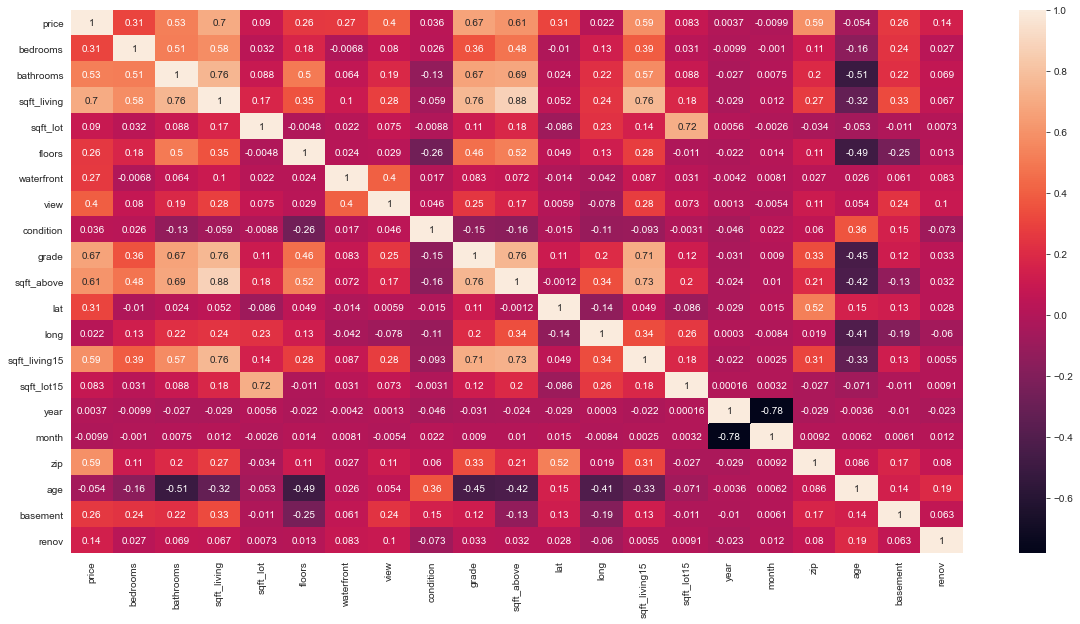

In [115]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [76]:
df.shape

(21597, 21)

## SCALING

In [77]:
X=df.drop('price', axis=1).values
y=df.price.values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(15117, 20)
(6480, 20)


## MODEL

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [80]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [81]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=200)

Epoch 1/200
473/473 [==============================] - 2s 3ms/step - loss: 432489853774.8523 - val_loss: 176906878976.0000
Epoch 2/200
473/473 [==============================] - 0s 815us/step - loss: 126684856164.4557 - val_loss: 83419799552.0000
Epoch 3/200
473/473 [==============================] - 0s 838us/step - loss: 88210883510.5485 - val_loss: 75523776512.0000
Epoch 4/200
473/473 [==============================] - 0s 805us/step - loss: 74542047024.6076 - val_loss: 67316711424.0000
Epoch 5/200
473/473 [==============================] - 0s 864us/step - loss: 67681233047.2236 - val_loss: 59414204416.0000
Epoch 6/200
473/473 [==============================] - 0s 899us/step - loss: 55883832583.5612 - val_loss: 51431227392.0000
Epoch 7/200
473/473 [==============================] - 0s 707us/step - loss: 53093308489.4515 - val_loss: 45798031360.0000
Epoch 8/200
473/473 [==============================] - 0s 813us/step - loss: 47508275588.8608 - val_loss: 42144108544.0000
Epoch 9/200
473

In [82]:
losses = pd.DataFrame(model.history.history)

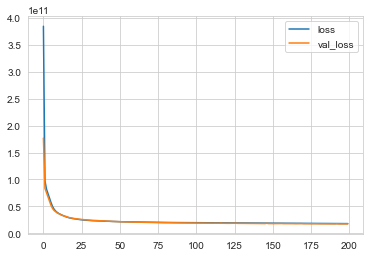

In [83]:
losses.plot();

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [85]:
pred= model.predict(X_test)

In [86]:
mean_squared_error(y_test, pred)

17281315216.243088

In [87]:
# mean_squared_error(y_test, pred)

In [88]:
mean_absolute_error(y_test, pred)

81382.34073832947

In [90]:
explained_variance_score(y_test, pred)

0.869976340922002

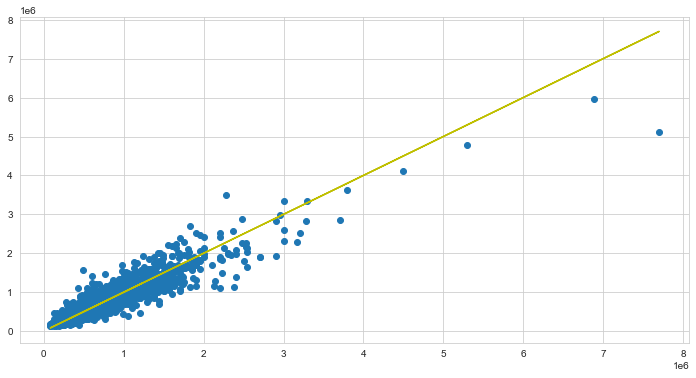

In [93]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, 'y');

In [94]:
single_house=df.drop('price', axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 20))

In [95]:
X_train.shape

(15117, 20)

In [96]:
model.predict(single_house)

array([[233424.14]], dtype=float32)

In [97]:
# model.predict(single_house)

In [98]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,zip,age,basement,renov
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,...,47.511,-122.257,1340,5650,2014,10,1,63,0,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,...,47.721,-122.319,1690,7639,2014,12,2,67,1,1
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,...,47.738,-122.233,2720,8062,2015,2,2,85,0,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,...,47.521,-122.393,1360,5000,2014,12,2,53,1,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,...,47.617,-122.045,1800,7503,2015,2,2,31,0,0


In [99]:
# df_err=pd.concat([df1, df2], axis=1)
df_err=pd.concat([pd.DataFrame(y_test.reshape(6480, 1)), pd.DataFrame(pred)], axis=1)

In [100]:
df_err.columns=['real', 'pred']

In [101]:
df_err['diff_abs']=abs(df_err.real-df_err.pred)

In [102]:
df_err.describe()

,real,pred,diff_abs
count,6480.000,6480.000,6480.000
mean,535139.166,541307.000,81382.341
std,364193.469,341690.531,103246.670
min,80000.000,128250.531,0.125
25%,320000.000,329556.492,22570.133
50%,449500.000,460633.562,54044.938
75%,635307.500,636326.500,102203.375
max,7700000.000,5966611.500,2586190.000


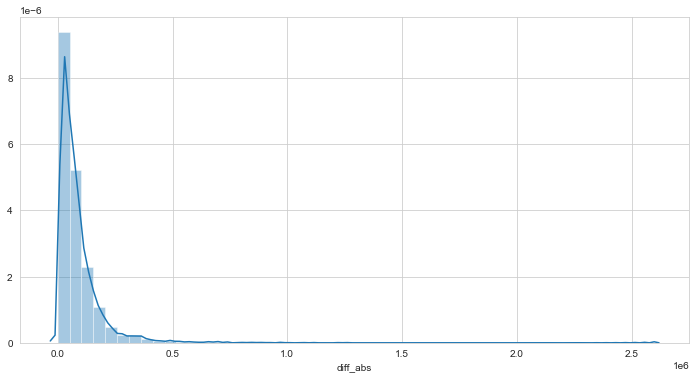

In [143]:
plt.figure(figsize=(12,6))
sns.distplot(df_err.diff_abs);

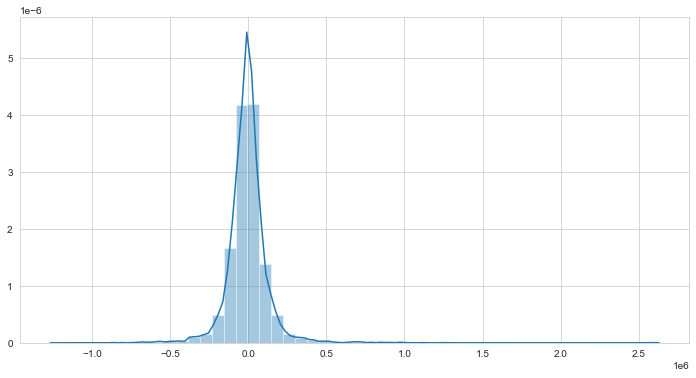

In [145]:
errors = y_test.reshape(6480, 1) - pred
plt.figure(figsize=(12,6))
sns.distplot(errors);

In [121]:
pd.DataFrame(errors).describe()

,0
count,6480.000
mean,-6167.967
std,131323.771
min,-1224874.000
25%,-62876.617
50%,-6889.656
75%,43979.367
max,2586190.000


### Let's focus on the min and max erros:

#### 1. Min Error

In [146]:
pd.DataFrame(df_err.diff_abs).min()

diff_abs   0.125
dtype: float64

In [147]:
df_err[df_err.diff_abs<1]

,real,pred,diff_abs
1326,475000.000,475000.125,0.125


In [124]:
df[df.price==475000].index

Int64Index([  234,   448,   501,   662,  1010,  1016,  1218,  1589,  1864,
             2022,
            ...
            19986, 20049, 20192, 20239, 20335, 20546, 20831, 21502, 21576,
            21591],
           dtype='int64', length=120)

In [149]:
dct={}
for i in df[df.price==475000].index:
    single_house_min = df.drop('price', axis=1).iloc[i]
    single_house_min = scaler.transform(single_house_min.values.reshape(-1, 20))
    diff=abs(model.predict(single_house_min)-df.iloc[i].price)
    dct[i] =diff

In [150]:
min(dct.values())

array([[0.0625]], dtype=float32)

In [172]:
key_list = list(dct.keys())
val_list = list(dct.values())
 
# print key with val 100
pos = val_list.index(min((dct.values())))
i=key_list[pos]

single_house_min = df.drop('price', axis=1).iloc[i]
single_house_min = scaler.transform(single_house_min.values.reshape(-1, 20))
model.predict(single_house_min)

print( i, 'th row estimation= ', float(model.predict(single_house_min)), '\n',  i, 'th row actual price= ', df.iloc[i].price,
     '\n', 'Min Error= ', abs(float(model.predict(single_house_min))-df.iloc[i].price))

1016 th row estimation=  475000.0625 
 1016 th row actual price=  475000.0 
 Min Error=  0.0625


#### 2. Max Error

In [159]:
pd.DataFrame(df_err.diff_abs).max()

diff_abs   2586190.000
dtype: float64

In [160]:
df_err[df_err.diff_abs==2586190].real

6370   7700000.000
Name: real, dtype: float64

In [164]:
df[df.price==7700000].index

Int64Index([7245], dtype='int64')

In [112]:
df.iloc[7245]

price           7700000.000
bedrooms              6.000
bathrooms             8.000
sqft_living       12050.000
sqft_lot          27600.000
floors                2.500
waterfront            0.000
view                  3.000
condition             4.000
grade                13.000
sqft_above         8570.000
lat                  47.630
long               -122.323
sqft_living15      3940.000
sqft_lot15         8800.000
year               2014.000
month                10.000
zip                   3.000
age                 108.000
basement              2.000
renov                 1.000
Name: 7245, dtype: float64

In [170]:
j=df[df.price==7700000].index[0]
single_house_max = df.drop('price', axis=1).iloc[j]
single_house_max = scaler.transform(single_house_max.values.reshape(-1, 20))

In [174]:
print( j, 'th row estimation= ', float(model.predict(single_house_max)), '\n',  j, 'th row actual price= ', df.iloc[j].price,
     '\n', 'Max Error= ', abs(float(model.predict(single_house_max))-df.iloc[j].price))

7245 th row estimation=  5113810.5 
 7245 th row actual price=  7700000.0 
 Max Error=  2586189.5


In [185]:
print('Explained Variable Score of our model is', explained_variance_score(y_test, pred))

Explained Variable Score of our model is 0.869976340922002


## THANKS